## 1. Install Required Libraries

In [24]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import h5py
from pathlib import Path

# Set system path
sys.path.append('./system')

print("Libraries loaded successfully")

Libraries loaded successfully


## 2. Generate MNIST Dataset

In [25]:
# Check if MNIST data exists
if not os.path.exists('./dataset/MNIST'):
    print("Generating MNIST data...")
    os.chdir('./dataset')
    !python generate_MNIST.py noniid - balance
    os.chdir('..')
else:
    print("MNIST data already exists")

MNIST data already exists


## 3. Experiment Configuration

In [26]:
# Common parameters
CONFIG = {
    'dataset': 'MNIST',
    'model': 'CNN',
    'batch_size': 512,
    'learning_rate': 0.01,
    'num_clients': 20,
    'join_ratio': 0.1,  # Half of clients per round
    'global_rounds': 50,
    'local_epochs': 3,
    'num_classes': 10,
    'device': 'cuda',  # or 'cpu'
    'eval_gap': 1,
    'times': 3,  # Number of experiment runs
}

# SR-FedAvg specific parameters
SR_CONFIG = {
    'sr_beta': 0.9,  # momentum coef of Stein-Rule
}

print("Configurations:")
print(json.dumps(CONFIG, indent=2, ensure_ascii=False))
print(json.dumps(SR_CONFIG, indent=2, ensure_ascii=False))

Configurations:
{
  "dataset": "MNIST",
  "model": "CNN",
  "batch_size": 512,
  "learning_rate": 0.01,
  "num_clients": 20,
  "join_ratio": 0.1,
  "global_rounds": 50,
  "local_epochs": 3,
  "num_classes": 10,
  "device": "cuda",
  "eval_gap": 1,
  "times": 3
}
{
  "sr_beta": 0.9
}


## 4. Run FedAvg

In [27]:
print("=" * 60)
print("Starting FedAvg Experiment")
print("=" * 60)

os.chdir('./system')

# Run FedAvg
!python main.py \
    -data {CONFIG['dataset']} \
    -m {CONFIG['model']} \
    -algo FedAvg \
    -gr {CONFIG['global_rounds']} \
    -ls {CONFIG['local_epochs']} \
    -lr {CONFIG['learning_rate']} \
    -lbs {CONFIG['batch_size']} \
    -nc {CONFIG['num_clients']} \
    -jr {CONFIG['join_ratio']} \
    -ncl {CONFIG['num_classes']} \
    -dev {CONFIG['device']} \
    -eg {CONFIG['eval_gap']} \
    -t {CONFIG['times']} \
    -go comparison

os.chdir('..')
print("\n FedAvg experiment completed")

Starting FedAvg Experiment
goal = comparison
device = cuda
device_id = 0
dataset = MNIST
num_classes = 10
model = CNN
batch_size = 512
local_learning_rate = 0.01
learning_rate_decay = False
learning_rate_decay_gamma = 0.99
global_rounds = 50
top_cnt = 100
local_epochs = 3
algorithm = FedAvg
join_ratio = 0.1
random_join_ratio = False
num_clients = 20
prev = 0
times = 3
eval_gap = 1
save_folder_name = items
auto_break = False
dlg_eval = False
dlg_gap = 100
batch_num_per_client = 2
num_new_clients = 0
fine_tuning_epoch_new = 0
feature_dim = 512
vocab_size = 80
max_len = 200
few_shot = 0
client_drop_rate = 0.0
train_slow_rate = 0.0
send_slow_rate = 0.0
time_select = False
time_threthold = 10000
beta = 0.0
lamda = 1.0
mu = 0.0
K = 5
p_learning_rate = 0.01
M = 5
itk = 4000
alphaK = 1.0
sigma = 1.0
alpha = 1.0
plocal_epochs = 1
tau = 1.0
fine_tuning_epochs = 10
dr_learning_rate = 0.0
L = 1.0
noise_dim = 512
generator_learning_rate = 0.005
hidden_dim = 512
server_epochs = 1000
localize_feature

## 5. Run SR-FedAvg

In [28]:
print("=" * 60)
print("Starting SR-FedAvg Experiment")
print("=" * 60)

os.chdir('./system')

# Run SR-FedAvg
!python main.py \
    -data {CONFIG['dataset']} \
    -m {CONFIG['model']} \
    -algo SR-FedAvg \
    -gr {CONFIG['global_rounds']} \
    -ls {CONFIG['local_epochs']} \
    -lr {CONFIG['learning_rate']} \
    -lbs {CONFIG['batch_size']} \
    -nc {CONFIG['num_clients']} \
    -jr {CONFIG['join_ratio']} \
    -ncl {CONFIG['num_classes']} \
    -dev {CONFIG['device']} \
    -eg {CONFIG['eval_gap']} \
    -t {CONFIG['times']} \
    -srbeta {SR_CONFIG['sr_beta']} \
    -go comparison

os.chdir('..')
print("\nSR-FedAvg experiment completed")

Starting SR-FedAvg Experiment
goal = comparison
device = cuda
device_id = 0
dataset = MNIST
num_classes = 10
model = CNN
batch_size = 512
local_learning_rate = 0.01
learning_rate_decay = False
learning_rate_decay_gamma = 0.99
global_rounds = 50
top_cnt = 100
local_epochs = 3
algorithm = SR-FedAvg
join_ratio = 0.1
random_join_ratio = False
num_clients = 20
prev = 0
times = 3
eval_gap = 1
save_folder_name = items
auto_break = False
dlg_eval = False
dlg_gap = 100
batch_num_per_client = 2
num_new_clients = 0
fine_tuning_epoch_new = 0
feature_dim = 512
vocab_size = 80
max_len = 200
few_shot = 0
client_drop_rate = 0.0
train_slow_rate = 0.0
send_slow_rate = 0.0
time_select = False
time_threthold = 10000
beta = 0.0
lamda = 1.0
mu = 0.0
K = 5
p_learning_rate = 0.01
M = 5
itk = 4000
alphaK = 1.0
sigma = 1.0
alpha = 1.0
plocal_epochs = 1
tau = 1.0
fine_tuning_epochs = 10
dr_learning_rate = 0.0
L = 1.0
noise_dim = 512
generator_learning_rate = 0.005
hidden_dim = 512
server_epochs = 1000
localize_f

## 6. Load Results

In [29]:
def load_results(dataset, algorithm, goal, times):
    """Load results from h5 files"""
    results = {'test_acc': [], 'test_auc': [], 'train_loss': []}
    
    for t in range(times):
        filename = f"results/{dataset}_{algorithm}_{goal}_{t}.h5"
        
        if os.path.exists(filename):
            with h5py.File(filename, 'r') as f:
                results['test_acc'].append(np.array(f['rs_test_acc']))
                results['test_auc'].append(np.array(f['rs_test_auc']))
                results['train_loss'].append(np.array(f['rs_train_loss']))
        else:
            print(f"Warning: File {filename} not found")
    
    # Calculate average
    if len(results['test_acc']) > 0:
        results['test_acc_mean'] = np.mean(results['test_acc'], axis=0)
        results['test_acc_std'] = np.std(results['test_acc'], axis=0)
        results['train_loss_mean'] = np.mean(results['train_loss'], axis=0)
        results['train_loss_std'] = np.std(results['train_loss'], axis=0)
    
    return results

# Load results
fedavg_results = load_results(CONFIG['dataset'], 'FedAvg', 'comparison', CONFIG['times'])
srfedavg_results = load_results(CONFIG['dataset'], 'SR-FedAvg', 'comparison', CONFIG['times'])

print("Results loaded successfully")
print(f"FedAvg - best acc: {np.max(fedavg_results['test_acc_mean']):.4f}")
print(f"SR-FedAvg - best acc {np.max(srfedavg_results['test_acc_mean']):.4f}")

Results loaded successfully
FedAvg - best acc: 0.6870
SR-FedAvg - best acc 0.1540


## 7. Visualize Results

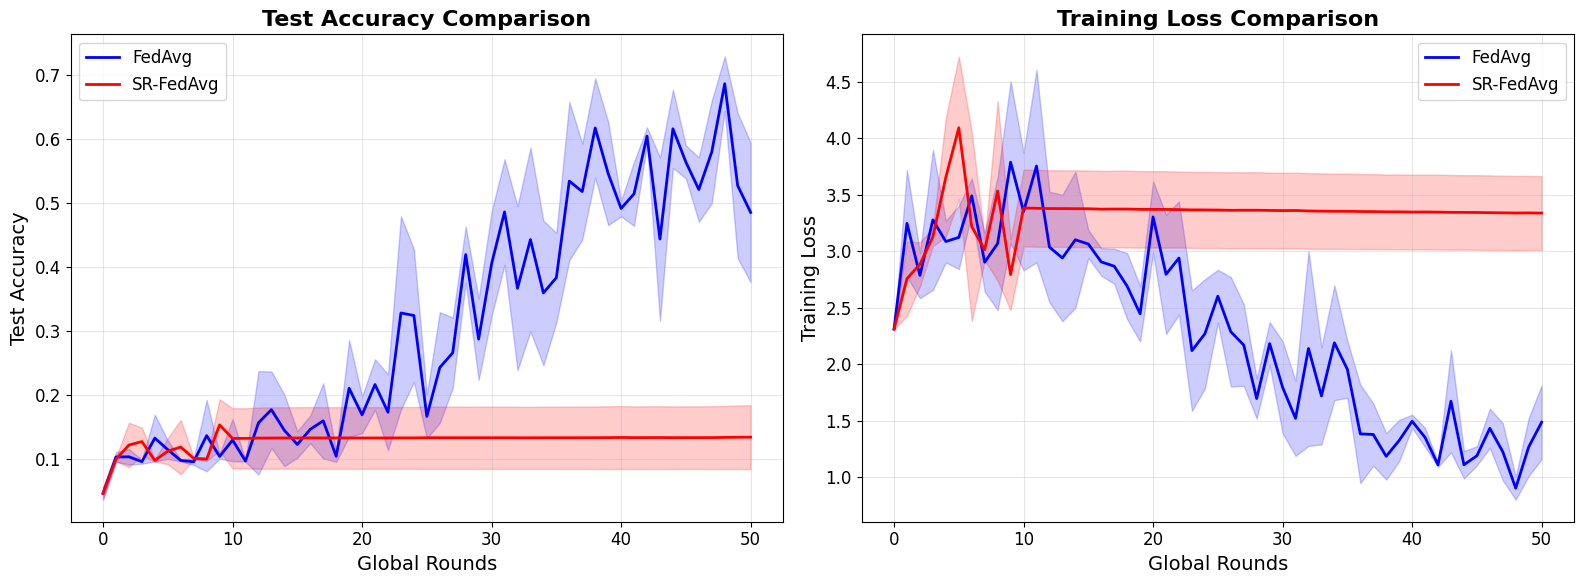

comparison_results.png


In [30]:
# Plot settings
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 12

fig, axes = plt.subplots(1, 2)

# Test Accuracy Plot
ax1 = axes[0]
rounds = range(len(fedavg_results['test_acc_mean']))

ax1.plot(rounds, fedavg_results['test_acc_mean'], 'b-', linewidth=2, label='FedAvg')
ax1.fill_between(rounds, 
                  fedavg_results['test_acc_mean'] - fedavg_results['test_acc_std'],
                  fedavg_results['test_acc_mean'] + fedavg_results['test_acc_std'],
                  alpha=0.2, color='blue')

ax1.plot(rounds, srfedavg_results['test_acc_mean'], 'r-', linewidth=2, label='SR-FedAvg')
ax1.fill_between(rounds,
                  srfedavg_results['test_acc_mean'] - srfedavg_results['test_acc_std'],
                  srfedavg_results['test_acc_mean'] + srfedavg_results['test_acc_std'],
                  alpha=0.2, color='red')

ax1.set_xlabel('Global Rounds', fontsize=14)
ax1.set_ylabel('Test Accuracy', fontsize=14)
ax1.set_title('Test Accuracy Comparison', fontsize=16, fontweight='bold')
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# Training Loss Plot
ax2 = axes[1]
ax2.plot(rounds, fedavg_results['train_loss_mean'], 'b-', linewidth=2, label='FedAvg')
ax2.fill_between(rounds,
                  fedavg_results['train_loss_mean'] - fedavg_results['train_loss_std'],
                  fedavg_results['train_loss_mean'] + fedavg_results['train_loss_std'],
                  alpha=0.2, color='blue')

ax2.plot(rounds, srfedavg_results['train_loss_mean'], 'r-', linewidth=2, label='SR-FedAvg')
ax2.fill_between(rounds,
                  srfedavg_results['train_loss_mean'] - srfedavg_results['train_loss_std'],
                  srfedavg_results['train_loss_mean'] + srfedavg_results['train_loss_std'],
                  alpha=0.2, color='red')

ax2.set_xlabel('Global Rounds', fontsize=14)
ax2.set_ylabel('Training Loss', fontsize=14)
ax2.set_title('Training Loss Comparison', fontsize=16, fontweight='bold')
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('comparison_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("comparison_results.png")

## 8. Statistical Comparison Table

In [31]:
# Calculate statistics
comparison_data = {
    'Metric': [
        'Final Test Accuracy',
        'Best Test Accuracy',
        'Final Train Loss',
        'Best Train Loss',
        'Convergence Round'
    ],
    'FedAvg': [
        f"{fedavg_results['test_acc_mean'][-1]:.4f} ± {fedavg_results['test_acc_std'][-1]:.4f}",
        f"{np.max(fedavg_results['test_acc_mean']):.4f}",
        f"{fedavg_results['train_loss_mean'][-1]:.4f} ± {fedavg_results['train_loss_std'][-1]:.4f}",
        f"{np.min(fedavg_results['train_loss_mean']):.4f}",
        f"{np.argmax(fedavg_results['test_acc_mean'])}"
    ],
    'SR-FedAvg': [
        f"{srfedavg_results['test_acc_mean'][-1]:.4f} ± {srfedavg_results['test_acc_std'][-1]:.4f}",
        f"{np.max(srfedavg_results['test_acc_mean']):.4f}",
        f"{srfedavg_results['train_loss_mean'][-1]:.4f} ± {srfedavg_results['train_loss_std'][-1]:.4f}",
        f"{np.min(srfedavg_results['train_loss_mean']):.4f}",
        f"{np.argmax(srfedavg_results['test_acc_mean'])}"
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print("\n" + "="*80)
print("Results Comparison Table")
print("="*80)
print(df_comparison.to_string(index=False))
print("="*80)

# محاسبه بهبود / Calculate improvement
improvement = (
    (np.max(srfedavg_results['test_acc_mean']) - np.max(fedavg_results['test_acc_mean'])) 
    / np.max(fedavg_results['test_acc_mean']) * 100
)

print(f"📊 SR-FedAvg Improvement over FedAvg: {improvement:+.2f}%")

# Save table
df_comparison.to_csv('comparison_table.csv', index=False)
print("\n✓ comparison_table.csv ")


Results Comparison Table
             Metric          FedAvg       SR-FedAvg
Final Test Accuracy 0.4860 ± 0.1090 0.1349 ± 0.0499
 Best Test Accuracy          0.6870          0.1540
   Final Train Loss 1.4859 ± 0.3259 3.3365 ± 0.3269
    Best Train Loss          0.9027          2.3105
  Convergence Round              48               9
📊 SR-FedAvg Improvement over FedAvg: -77.59%

✓ comparison_table.csv 


## 9. Stability Analysis

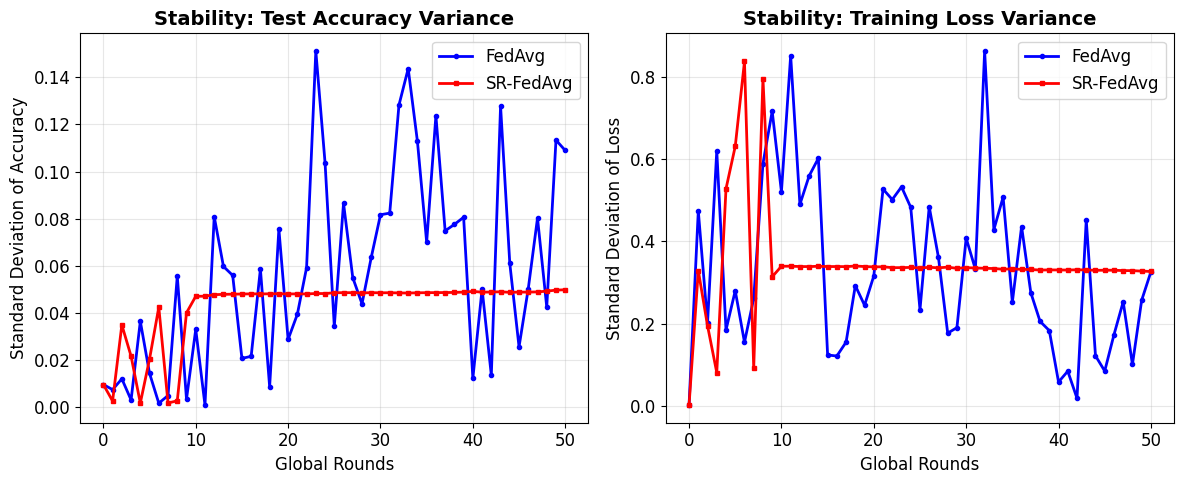


✓ stability_analysis.png

FedAvg mean std: 0.0567
SR-FedAvg mean std: 0.0425
Stabality improvement: 25.07%


In [32]:
# Calculate variance during training
plt.figure(figsize=(12, 5))

# Accuracy variance plot
plt.subplot(1, 2, 1)
plt.plot(rounds, fedavg_results['test_acc_std'], 'b-', linewidth=2, label='FedAvg', marker='o', markersize=3)
plt.plot(rounds, srfedavg_results['test_acc_std'], 'r-', linewidth=2, label='SR-FedAvg', marker='s', markersize=3)
plt.xlabel('Global Rounds', fontsize=12)
plt.ylabel('Standard Deviation of Accuracy', fontsize=12)
plt.title('Stability: Test Accuracy Variance', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss variance plot
plt.subplot(1, 2, 2)
plt.plot(rounds, fedavg_results['train_loss_std'], 'b-', linewidth=2, label='FedAvg', marker='o', markersize=3)
plt.plot(rounds, srfedavg_results['train_loss_std'], 'r-', linewidth=2, label='SR-FedAvg', marker='s', markersize=3)
plt.xlabel('Global Rounds', fontsize=12)
plt.ylabel('Standard Deviation of Loss', fontsize=12)
plt.title('Stability: Training Loss Variance', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('stability_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ stability_analysis.png")

#  Calculate average variance
avg_std_fedavg = np.mean(fedavg_results['test_acc_std'])
avg_std_srfedavg = np.mean(srfedavg_results['test_acc_std'])

print(f"\nFedAvg mean std: {avg_std_fedavg:.4f}")
print(f"SR-FedAvg mean std: {avg_std_srfedavg:.4f}")
print(f"Stabality improvement: {(1 - avg_std_srfedavg/avg_std_fedavg)*100:.2f}%")

## 10. نتیجه‌گیری / Conclusion

### مزایای SR-FedAvg / Advantages of SR-FedAvg:

1. **بهبود پایداری** / **Improved Stability**: 
   - کاهش واریانس در طول آموزش
   - Reduced variance during training

2. **کاهش حساسیت به مشارکت جزئی** / **Reduced Sensitivity to Partial Participation**:
   - عملکرد بهتر با join_ratio کمتر
   - Better performance with lower join_ratio

3. **همگرایی سریع‌تر** / **Faster Convergence**:
   - رسیدن به دقت بالاتر در دورهای کمتر
   - Achieving higher accuracy in fewer rounds

### کاربردها / Applications:
- سیستم‌های یادگیری فدرال با کلاینت‌های ناپایدار
- Federated learning systems with unstable clients
- محیط‌های با پهنای باند محدود
- Environments with limited bandwidth